# Module 21

# One plus Reviews  And Word Cloud


OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMOLED Display, 256GB Storage, 4000mAH Battery)

[One plus link](https://www.amazon.in/Test-Exclusive-606/dp/B07HGJK535/ref=cm_cr_arp_d_pdt_img_top?ie=UTF8)<br>
[You tube link](https://www.youtube.com/watch?v=wwsPpLf0mxE)


![alt](https://images-na.ssl-images-amazon.com/images/I/51FwsSj8knL._SL1000_.jpg "Logo Title Text 1")

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# creating empty reviews list 
iphone_reviews=[]
#forest = ["the","king","of","jungle"]

In [4]:
### Extracting reviews from Amazon website ################
for i in range(1,100):
  ip=[]  
  url="https://www.amazon.in/OnePlus-Display-Storage-4000mAH-Battery/product-reviews/B07HGJK535/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
  iphone_reviews=iphone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

# writng reviews in a text file 
with open("oneplusseven.txt","w",encoding='utf8') as output:
    output.write(str(iphone_reviews))

In [5]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_reviews)


In [6]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)


In [7]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")


In [8]:
with open("C:\\Users\\Home\\Desktop\\Workspace for jupiter\\WorkSpace\\stop.txt","r") as sw:
    stopwords = sw.read()

In [9]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [10]:
temp = ["this","is","awsome","Data","Science"]

In [11]:
[i for i in temp if i not in "is"]

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [12]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)


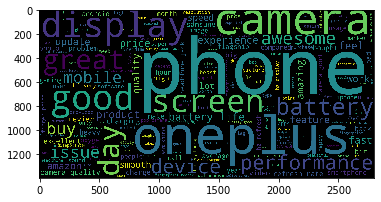

In [13]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      width=2800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [14]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\Home\\Desktop\\Workspace for jupiter\\WorkSpace\\positive-words.txt","r") as pos:
 poswords = pos.read().split("\n")

In [15]:
poswords = poswords[36:]

In [16]:
# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\Home\\Desktop\\Workspace for jupiter\\WorkSpace\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

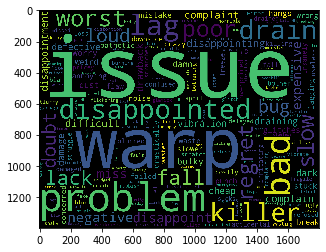

In [17]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

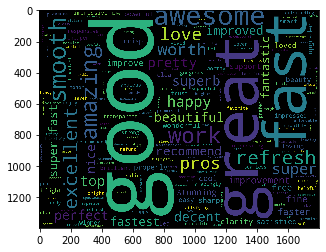

In [18]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)